0 0 12 72 4308
0 1 12 72 4236
0 2 12 72 4164
0 3 12 72 4092
0 4 12 72 4020
0 5 12 72 3948
0 6 12 72 3876
0 7 12 72 3804
0 8 12 72 3732
0 9 12 72 3660
0 10 12 72 3588
0 11 12 72 3516
0 12 12 72 3444
0 13 12 72 3372
0 14 12 72 3300
0 15 12 72 3228
0 16 12 72 3156
0 17 12 72 3084
0 18 12 72 3012
0 19 12 72 2940
0 20 12 72 2868
0 21 12 72 2796
0 22 12 72 2724
0 23 12 72 2652
0 24 12 72 2580
0 25 12 72 2508
0 26 12 72 2436
0 27 12 72 2364
0 28 12 72 2292
0 29 12 72 2220
0 30 12 72 2148
0 31 12 72 2076
0 32 12 72 2004
0 33 12 72 1932
0 34 12 72 1860
0 35 12 72 1788
0 36 12 72 1716
0 37 12 72 1644
0 38 12 72 1572
0 39 12 72 1500
0 40 12 72 1428
0 41 12 72 1356
0 42 12 72 1284
0 43 12 72 1212
0 44 12 72 1140
0 45 12 72 1068
0 46 12 72 996
0 47 12 72 924
0 48 12 72 852
0 49 12 72 780
0 50 12 72 708
0 51 12 72 636
0 52 12 72 564
0 53 12 72 492
0 54 12 72 420
0 55 12 72 348
0 56 12 72 276
0 57 12 72 204
0 58 12 72 132
0 59 12 72 60
0 60 12 72 12
0 61 12 72 84
0 62 12 72 156
0 63 12 72 228
0 64 12

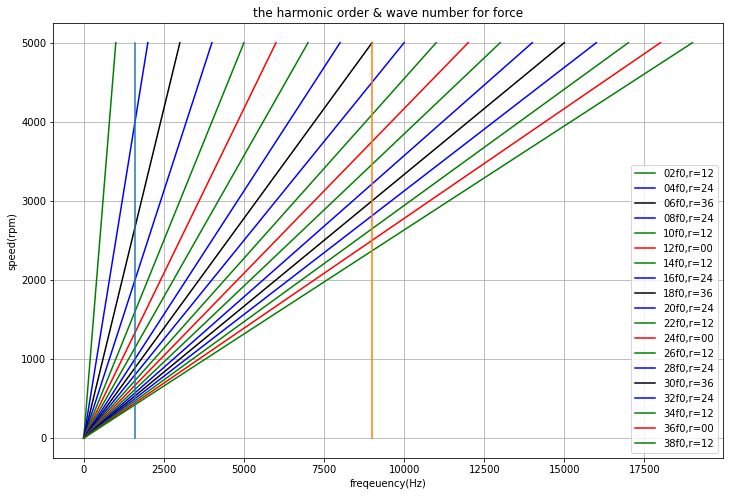

In [57]:
import pandas as pd
import numpy as np
import sympy as sym
import seaborn as sns 
import matplotlib as plt
import matplotlib.pyplot as plt

poles=12
slot=72
rpm=5000
u=60
v=60

fre_e=(rpm/60.)*(poles/2)
fre_r=(rpm/60.)
gcd=sym.gcd(poles,slot)

uu=np.arange(1,u+1) #time
vv=np.arange(-v,v+1) #space
uvtable=np.zeros((uu.size,vv.size),dtype='int')
for i in np.arange(uu.size):
    for j in np.arange(vv.size):
        uvtable[i,j]=np.abs(uu[i]*poles+vv[j]*slot)
        print (i,j,poles,slot,uvtable[i,j])

uvtab=pd.DataFrame(uvtable,columns=vv, index=uu)
uvtab

fslot=np.arange(2*fre_e,20000,2*fre_e) #20000Hz까지의 슬롯주파수
mmode=np.size(np.unique(np.min(uvtab,1))) 
modnum=np.unique(np.min(uvtab,1))[1] # 0을 제외한 두번째 작은값을 
color=['r','g','b','k','c','m','y'] #컬러리스트를 만든다.

#가장 작은 파수를 가지고 시간차수에 대해 찾는다.

aa=np.unique(np.min(uvtab,1))
bb=np.array(np.min(uvtable,1))

print(aa)
print(bb)

pcc=[]
for i in bb:
    for j in range(aa.size):
        if i==aa[j]:
            pcc.append(j)
pcc=np.array(pcc)
bb




plt.figure(figsize=(12,8))
for i in np.arange(fslot.size):
       if i<=u-1:
            plt.plot([0,fslot[i]],[0, rpm], color[pcc[i]], label='%02df0,r=%02d'% ((i+1)*2, bb[i]))
plt.plot([1600,1600],[0,rpm])
plt.plot([9000,9000],[0,rpm])
plt.title(u'the harmonic order & wave number for force')
plt.ylabel(u'speed(rpm)')
plt.xlabel(u'freqeuency(Hz)')
plt.grid('on')
plt.legend()


In [58]:
#가장 작은 파수를 가지는 차수들
low_ord=np.argwhere(bb==aa[1]).ravel()+1
print ('가장 저차를 갖는 주파수 차수:',low_ord*2)

#concern_rpm
rrpm=4800
fre_e=(rrpm/60.)*poles/2
print ('가장 저차를 갖는 주파수:', fre_e*low_ord*2)
print ('코깅주파수', rrpm*sym.lcm(poles,slot)/60)
print ('슬롯하모닉에 주파수:', fre_e*slot)


#x=np.arange(-1,1,0.1)
#y=np.arange(-1,1,0.1)
#X,Y=np.meshgrid(x,y)
#Z=np.exp(-(X**2+Y**2))
#CS=plt.contourf(X,Y,Z)



가장 저차를 갖는 주파수 차수: [  2  10  14  22  26  34  38  46  50  58  62  70  74  82  86  94  98 106
 110 118]
가장 저차를 갖는 주파수: [  960.  4800.  6720. 10560. 12480. 16320. 18240. 22080. 24000. 27840.
 29760. 33600. 35520. 39360. 41280. 45120. 47040. 50880. 52800. 56640.]
코깅주파수 5760
슬롯하모닉에 주파수: 34560.0


/var/folders/3j/h_3wwq996wg6rrmqrfscpws80000gn/T/ipykernel_24985/1423952990.py:19: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  cset=ax.contourf(X,Y,C.T,zdir='z',offset=0,cmap=cm.jet)


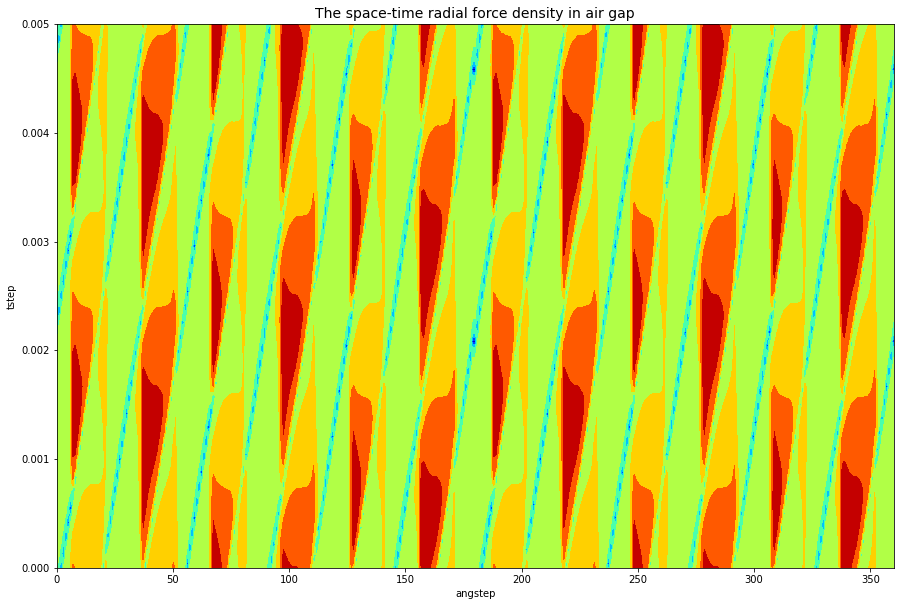

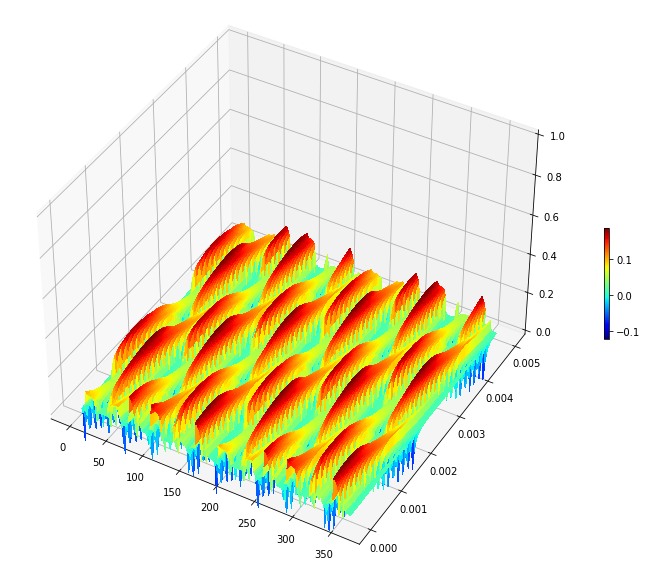

In [59]:
from matplotlib import cm
import pandas as pd

C=pd.read_csv("236Nm@213rpm_Radial_Force.csv")

#atemp_before=C.columns[0]
C.rename(columns={'0':'index1'},inplace=True)
#atemp_after=C.columns[0]
C.set_index('index1',inplace=True)
C.style.hide_index()



nrow=len(C)
ncol=C.shape[1]
X,Y= np.meshgrid(np.linspace(0,360,nrow), np.linspace(0,0.005,ncol))
fig, ax=plt.subplots()
fig.set_size_inches((15,10))
cset=ax.contourf(X,Y,C.T,zdir='z',offset=0,cmap=cm.jet)
ax.set_xlabel('angstep')
ax.set_ylabel('tstep')
plt.title(u'The space-time radial force density in air gap', fontproperties='Malgun Gothic', fontsize=14)
plt.show()

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1,projection='3d')
g=ax.plot_surface(X,Y,C.T/1000.,rstride=1,cstride=1,antialiased=False,alpha=1,cmap='jet')
ax.view_init(40,-60)
ax.set_zlim([0,1])
fig.tight_layout()
plt.colorbar(g,shrink=0.2)
plt.show()

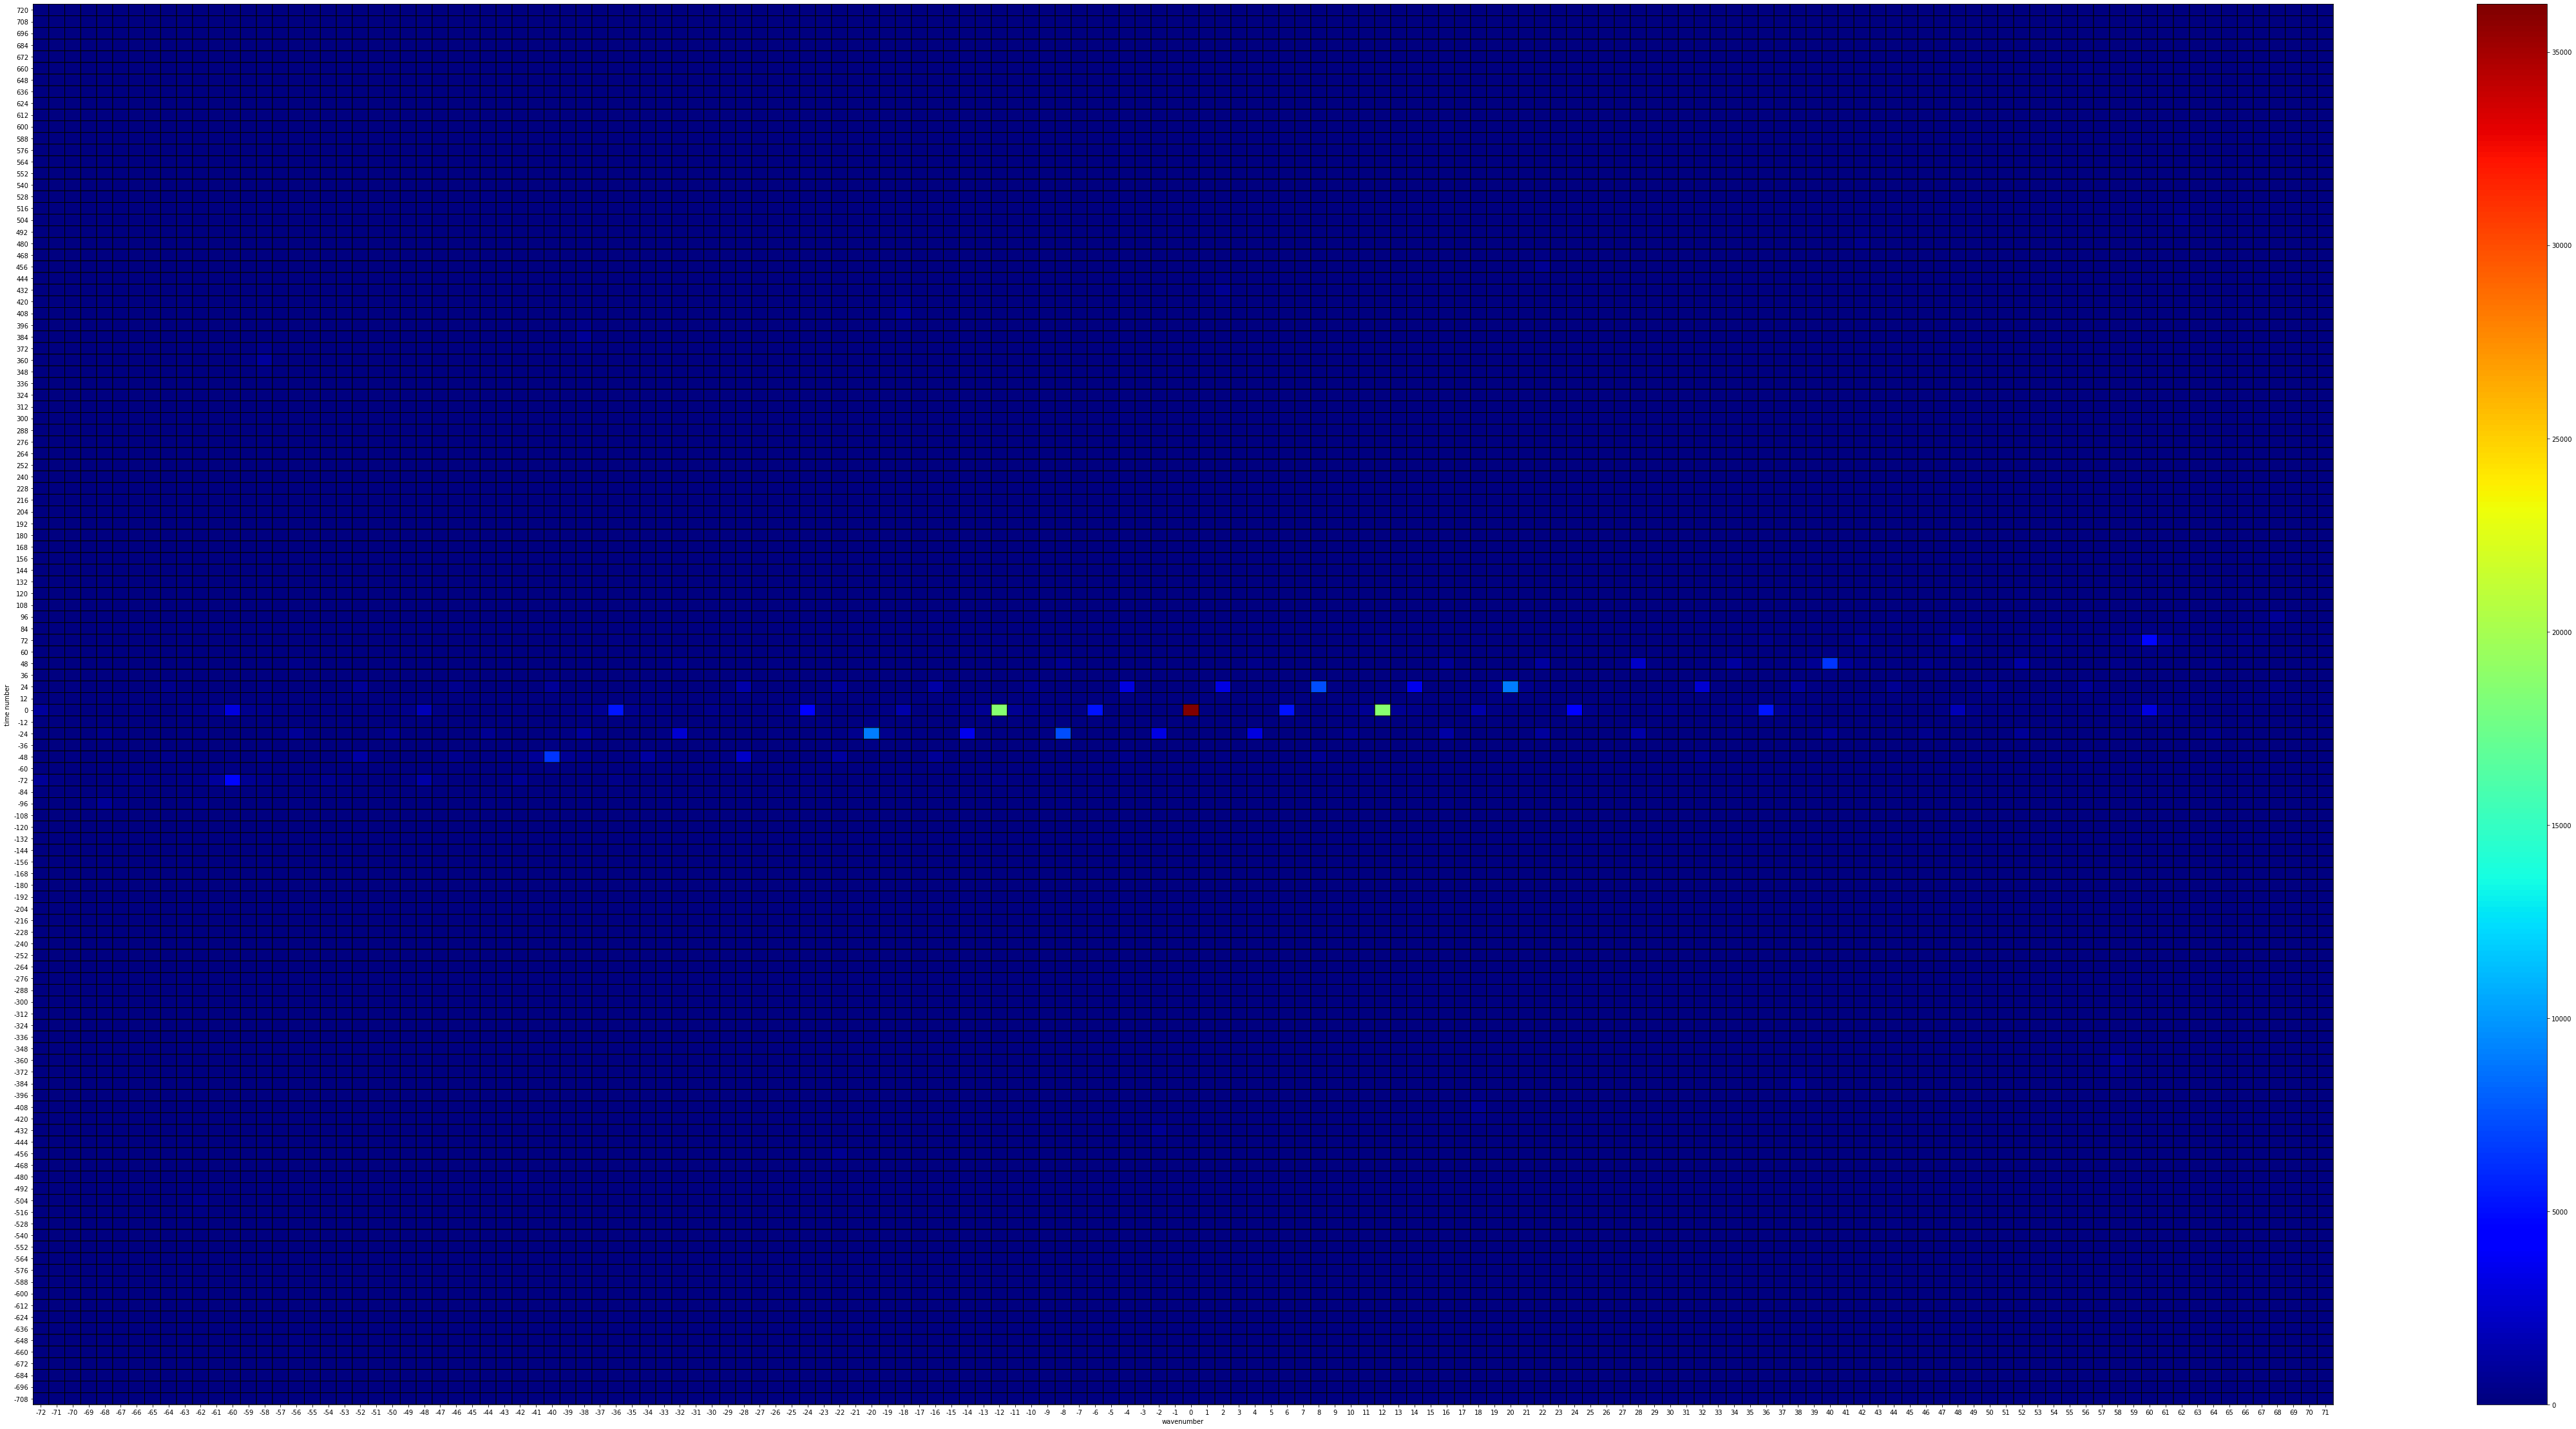

In [60]:
#2d FFT for the time-spatial radial force density
import numpy as np

ps=C.T
#atemp_show=ps.head()
#type_show=ps.dtypes
#atemp_fftn=np.fft.fftn(ps)
#atemp_abs_fftn=abs(np.fft.fftn(ps))

ffs=np.fft.fftshift(abs(np.fft.fftn(ps)))*2/len(ps)

#fftn :discrete fft
# fftshift 파수가 0인 부분을 정중앙에 위치시키고 재배열
#ffst는 주파수의 array
#leng_temp=len(ps)

Nx,Nt=ffs.shape
#Nnx,Nnt=ffs.shape
#shape (numpy) : 행렬의 차원 
Nx=int(Nx); Nt=int(Nt) #굳이?

waveno=72
timeno=60

f=np.fft.fftshift(np.fft.fftfreq(Nx,1/Nx)) # 시간 fft
f.astype(int)

k=np.fft.fftshift(np.fft.fftfreq(Nt,1/Nt)) # 공간상 fft

#0이 아닌 배열 요소의 색인을 요소별로 그룹화하십시오.
fcent=int(np.argwhere(f==0))
kcent=int(np.argwhere(k==0))

ff=f[fcent-timeno:fcent+timeno]
kk=k[kcent-waveno:kcent+waveno]
#지정한 wavenumber와 timenumber에 대해서만 frame 생성
#atemp_ff=ff[-2]
#atemp_aaa=np.arange()
aaa=-np.arange(ff[0],ff[-1]+1,dtype=np.int64)*poles
#[-1]은 끝에서 첫번째 값, -붙여서 순서가 바뀌게 되었네
bbb=np.arange(kk[0],kk[-1]+1,dtype=np.int64)

##이게 포인트인가
sffs=ffs[fcent-timeno:fcent+timeno,kcent-waveno:kcent+waveno]
#atemp_start=kcent-waveno
#atemp_lst=kcent+waveno
#atemp_b=ffs[-120,0]
sffs[sffs<0.1]=0 


fig, ax =plt.subplots()
fig.set_size_inches((80,40))
ax.set_xticks(np.arange(kk.size)+0.5)
ax.set_xticklabels(bbb,fontsize=10)
ax.set_yticks(np.arange(ff.size)+0.5)
ax.set_yticklabels(aaa,fontsize=10)
plt.pcolor(sffs,edgecolors='k', linewidth=1,cmap=cm.jet,) #,cmap='tab20'
plt.xlabel('wavenumber',fontsize=10)
plt.ylabel('time number', fontsize=10)

plt.gca().invert_yaxis()
plt.colorbar()
plt.show()





